#### 서울 열린 데이터 광장
    -   서울시 자치구 년도별 cctv 설치 현황(https://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do)
    -   서울시 5대 범죄 발생 현황(https://data.seoul.go.kr/dataList/316/S/2/datasetView.do)
    -   서울시 주민등록인구(월별_구별) 통계(https://data.seoul.go.kr/dataList/11067/S/2/datasetView.do)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter("ignore") # 무시할게

sns.set_theme()
sns.set(rc={"figure.figsize":(12,5)})

plt.rcParams["font.family"] = "Apple SD Gothic Neo"
plt.rcParams["axes.unicode_minus"] = False

#### 1. cctv 설치현황

In [3]:
# cctv 데이터 로드

cctv_df = pd.read_csv("./data/CCTV 설치 현황_221231기준.csv",encoding="cp949",thousands=",",skiprows=[1])
cctv_df.head(3)

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,...,Unnamed: 16374,Unnamed: 16375,Unnamed: 16376,Unnamed: 16377,Unnamed: 16378,Unnamed: 16379,Unnamed: 16380,Unnamed: 16381,Unnamed: 16382,Unnamed: 16383
0,종로구,1980,36,540,107,161,131,158,152,69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,중 구,2584,130,87,77,236,240,372,386,155,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,용산구,2847,44,50,68,83,295,491,115,322,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cctv_df.columns

Index(['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년',
       ...
       'Unnamed: 16374', 'Unnamed: 16375', 'Unnamed: 16376', 'Unnamed: 16377',
       'Unnamed: 16378', 'Unnamed: 16379', 'Unnamed: 16380', 'Unnamed: 16381',
       'Unnamed: 16382', 'Unnamed: 16383'],
      dtype='object', length=16384)

In [5]:
# 데이터 전처리
# 필요한 컬럼만 복사해서 데이터프레임 생성

cctv_df = cctv_df[['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년','2020년','2021년','2022년']]

In [6]:
cctv_df.head(1)

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291


In [7]:
# 컬럼명 변경
# 구분 => 구 별, 총계 => cctv 총계, 2013년 이전\n설치된 CCTV => 2013년 이전
cctv_df.rename(columns={"구분":"구 별","총계":"cctv 총계","2013년 이전\n설치된 CCTV":"2013년 이전"},inplace=True)

In [8]:
# 2020년 이전 컬럼 생성 = 2013 년 이전 + ~~~~ + 2020년
# 방법 1
cctv_df["2020년 이전"] = cctv_df["2013년 이전"] + cctv_df["2013년"] + cctv_df["2014년"] + cctv_df["2015년"] + cctv_df["2016년"] + cctv_df["2017년"] + cctv_df["2018년"] + cctv_df["2019년"] + cctv_df["2020년"]

In [9]:
cctv_df.head(1)

,구 별,cctv 총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2020년 이전
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,1604


In [10]:
cctv_df.drop(columns=['2020년 이전'],inplace=True)

In [11]:
# 2020년 이전 컬럼 생성 = 2013 년 이전 + ~~~~ + 2020년
# 방법 2 : difference()

# cctv_df.columns.difference(['구 별', 'cctv 총계','2021년', '2022년'])

cctv_df["2020년 이전"] = cctv_df[cctv_df.columns.difference(['구 별', 'cctv 총계','2021년', '2022년'])].sum(axis=1)

In [12]:
cctv_df[cctv_df.columns.difference(['구 별', 'cctv 총계','2021년', '2022년'])].sum(axis=1)

0      3208
1      4088
2      4182
3      6896
4      5094
5      4558
6      6784
7      8194
8      4452
9      2122
10     4490
11     7320
12     5516
13     4668
14     6332
15     4542
16     7532
17     4304
18     7730
19     4572
20     9368
21     7106
22    12522
23     5422
24     4920
dtype: int64

In [13]:
cctv_df.head(1)

,구 별,cctv 총계,2013년 이전,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2020년 이전
0,종로구,1980,36,540,107,161,131,158,152,69,250,85,291,1604


In [14]:
cctv_df.columns

Index(['구 별', 'cctv 총계', '2013년 이전', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년', '2020년 이전'],
      dtype='object')

In [15]:
cctv_df.drop(columns=['2013년 이전', '2013년', '2014년', '2015년', '2016년','2017년', '2018년', '2019년', '2020년'],inplace=True)

In [16]:
cctv_df.head(3)

,구 별,cctv 총계,2021년,2022년,2020년 이전
0,종로구,1980,85,291,1604
1,중 구,2584,403,137,2044
2,용산구,2847,422,334,2091


In [17]:
# 중 구 ==> 중구
cctv_df.iloc[1,0] = "중구"

In [18]:
# 데이터 분석
# 1. 구별 cctv 가 가장 적게 설치되어 있는 구 알아보기

cctv_df[min(cctv_df['cctv 총계']) == cctv_df['cctv 총계']]

,구 별,cctv 총계,2021년,2022년,2020년 이전
0,종로구,1980,85,291,1604


In [19]:
# 2. 구별 cctv 가 가장 많이 설치되어 있는 구 알아보기

cctv_df[max(cctv_df['cctv 총계']) == cctv_df['cctv 총계']]

,구 별,cctv 총계,2021년,2022년,2020년 이전
22,강남구,7243,514,468,6261


#### 2. 서울시 거주 인구 데이터


In [20]:
seoul_df = pd.read_excel("./data/주민등록인구(월별)_202212.xlsx",skiprows=[0,1,3],usecols='B,D,G,J')
seoul_df.head()

,동별(2),소계.1,소계.2,소계.3
0,종로구,152211,141379,10832
1,중구,130785,120437,10348
2,용산구,233284,218650,14634
3,성동구,288234,281000,7234
4,광진구,351252,337416,13836


In [21]:
# 컬럼명 변경
# 구 별, 총인구, 한국인, 외국인
seoul_df.columns=['구 별','총인구','한국인','외국인']

In [22]:
# 외국인 컬럼 기준으로 내림차순
seoul_df.sort_values("외국인",ascending=False)

,구 별,총인구,한국인,외국인
16,구로구,418418,395315,23103
18,영등포구,398085,375675,22410
5,동대문구,353601,336644,16957
2,용산구,233284,218650,14634
20,관악구,501226,486752,14474
4,광진구,351252,337416,13836
12,서대문구,319554,306337,13217
17,금천구,242818,229642,13176
7,성북구,441984,430397,11587
13,마포구,375585,364638,10947


In [23]:
# cctv 설치 대수 대비 범죄율 파악
# cctv_df 와 seoul_df 합치기
merge_df = pd.merge(seoul_df,cctv_df,on="구 별")

In [24]:
# merge_df index 설정 : 구 별

merge_df.set_index("구 별",inplace=True)

In [25]:
merge_df.head(3)

,총인구,한국인,외국인,cctv 총계,2021년,2022년,2020년 이전
구 별,,,,,,,
종로구,152211,141379,10832,1980,85,291,1604
중구,130785,120437,10348,2584,403,137,2044
용산구,233284,218650,14634,2847,422,334,2091


In [26]:
# 1인당 cctv 비율 구하기
# 1인당 cctv 비율 = cctv 총계 / 총인구 * 100

merge_df["1인당 cctv 비율"] = merge_df["cctv 총계"] / merge_df["총인구"] * 100

In [27]:
merge_df.head(3)

,총인구,한국인,외국인,cctv 총계,2021년,2022년,2020년 이전,1인당 cctv 비율
구 별,,,,,,,,
종로구,152211,141379,10832,1980,85,291,1604,1.300826
중구,130785,120437,10348,2584,403,137,2044,1.975762
용산구,233284,218650,14634,2847,422,334,2091,1.220401


In [ ]:
# 상관계수
# 변수간의 관계의 정도와 방향을 수치로 요약해 주는 지표
# 수치는 -1 ~ +1 사이의 값으로 나타남
# 0에 가까울수록 상관 관계는 낮아지며, -1이나 +1에 가까울수록 상관관계는 높아짐
# 증감의 방향이 + 인 경우에는 정적인 상관관계,  - 인 경우에는 부정적인 상관관계가 있다고 봄

In [28]:
merge_df['총인구'].corr(merge_df['cctv 총계'],method='spearman')

0.4815384615384616

In [29]:
merge_df['외국인'].corr(merge_df['cctv 총계'],method='spearman')

0.07461538461538461

#### 시각화

Text(0.5, 1.0, '구 별 1인당 cctv 비율')

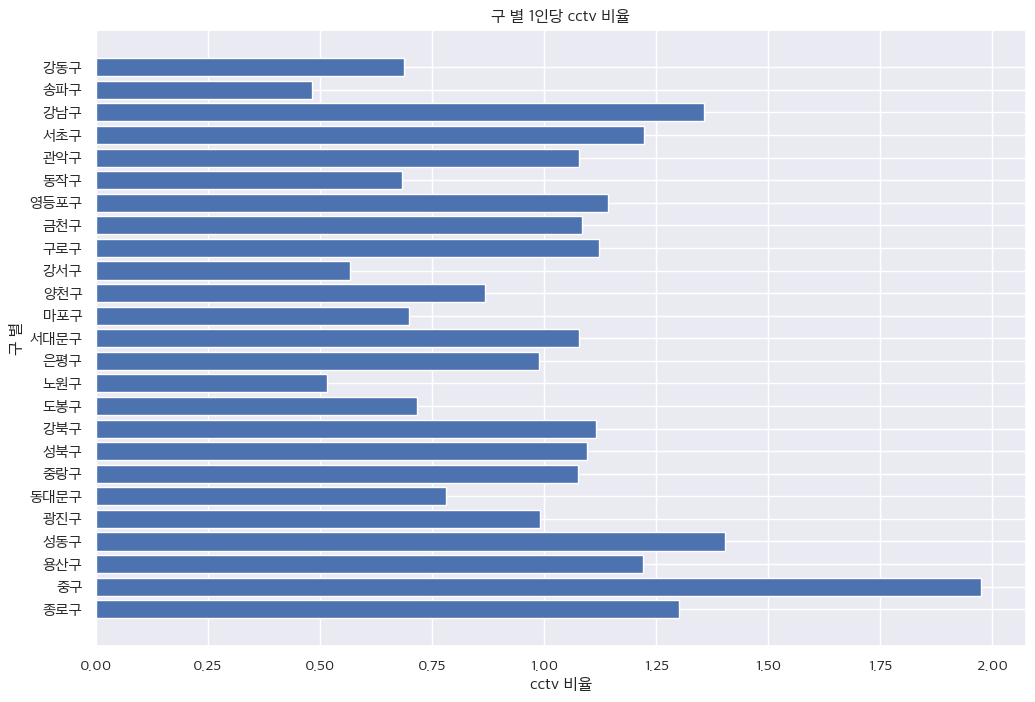

In [30]:
plt.figure(figsize=(12,8))

plt.barh(merge_df.index,merge_df['1인당 cctv 비율'])
plt.xlabel("cctv 비율")
plt.ylabel("구 별")
plt.title("구 별 1인당 cctv 비율")

<Axes: ylabel='구 별'>

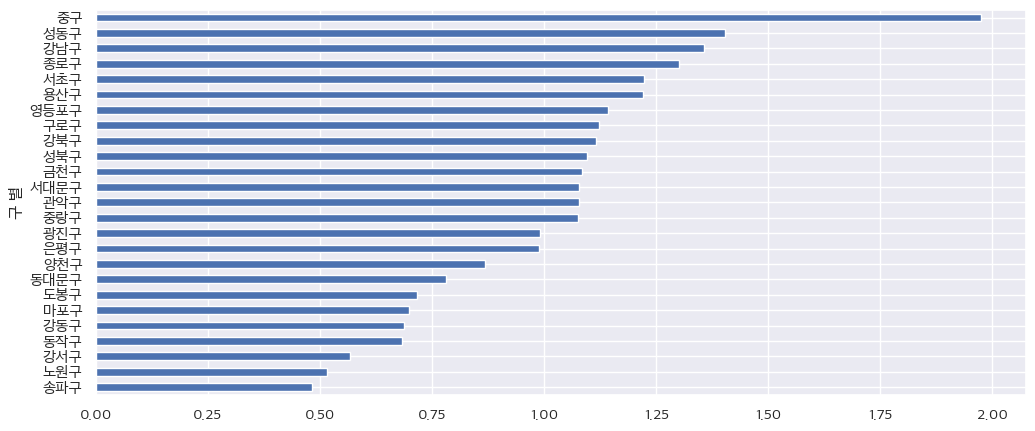

In [31]:
merge_df['1인당 cctv 비율'].sort_values().plot.barh()   # 정렬해서 그려줌
# plt.title("구 별 1인당 cctv 비율")
# plt.show()

<Axes: xlabel='1인당 cctv 비율', ylabel='구 별'>

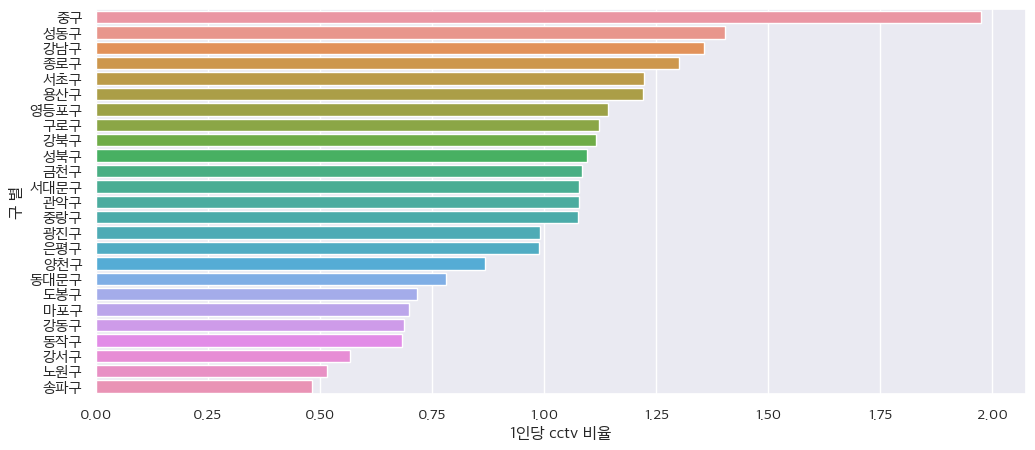

In [32]:
sns.barplot(data=merge_df,x='1인당 cctv 비율',y=merge_df.index,order=merge_df['1인당 cctv 비율'].sort_values(ascending=False).index)

#### 3. 5대 범죄

In [33]:
crime_df = pd.read_excel("./data/5대범죄_2021.xlsx",usecols='B:D', skiprows=[0,1,2,4])
crime_df.head(3)

,자치구별(2),발생,검거
0,종로구,2712,2755
1,중구,2861,2072
2,용산구,2381,1659


In [34]:
# 컬럼명 변경
# 구 별, 범죄건, 검거건
crime_df.columns=["구 별","범죄건","검거건"]

# 인덱스 설정 : 구 별
crime_df.set_index("구 별",inplace=True)

# 검거율 = 검거건 / 범죄건 * 100
crime_df["검거율"] = crime_df["검거건"] / crime_df["범죄건"] * 100

In [35]:
crime_df

,범죄건,검거건,검거율
구 별,,,
종로구,2712,2755,101.585546
중구,2861,2072,72.422230
용산구,2381,1659,69.676606
성동구,2112,1510,71.496212
광진구,3087,2202,71.331390
동대문구,2959,2113,71.409260
중랑구,3210,2405,74.922118
성북구,2411,1787,74.118623
강북구,2301,1912,83.094307


In [37]:
# crime_df, merge_df 병합 : merge(), concat()

merge_crime_df = pd.concat([merge_df,crime_df],axis=1)   # concat 사용해서 병합함
merge_crime_df.head()

,총인구,한국인,외국인,cctv 총계,2021년,2022년,2020년 이전,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,
종로구,152211,141379,10832,1980,85,291,1604,1.300826,2712,2755,101.585546
중구,130785,120437,10348,2584,403,137,2044,1.975762,2861,2072,72.422230
용산구,233284,218650,14634,2847,422,334,2091,1.220401,2381,1659,69.676606
성동구,288234,281000,7234,4047,367,232,3448,1.404068,2112,1510,71.496212
광진구,351252,337416,13836,3480,662,271,2547,0.990742,3087,2202,71.331390


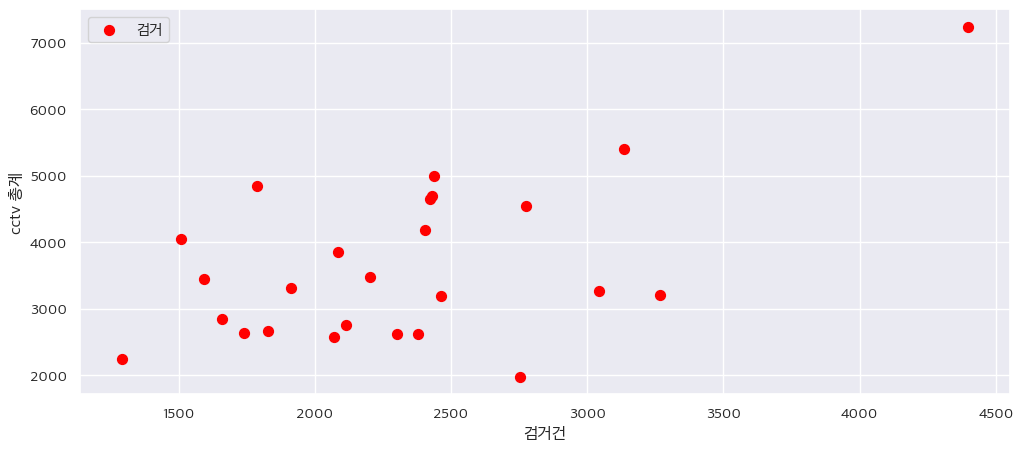

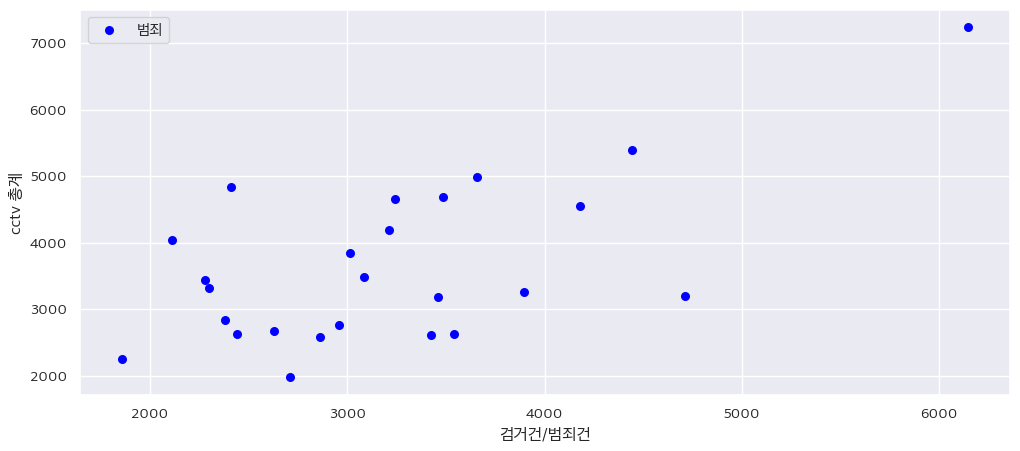

In [39]:
# 검거건, cctv 총계
# 범죄건, cctv 총계

merge_crime_df.plot.scatter(x="검거건",y="cctv 총계",color="red",s=50,label="검거")
merge_crime_df.plot.scatter(x="범죄건",y="cctv 총계",color="blue",s=30,label="범죄")
plt.xlabel("검거건/범죄건")
plt.show()  # 따로 그려짐

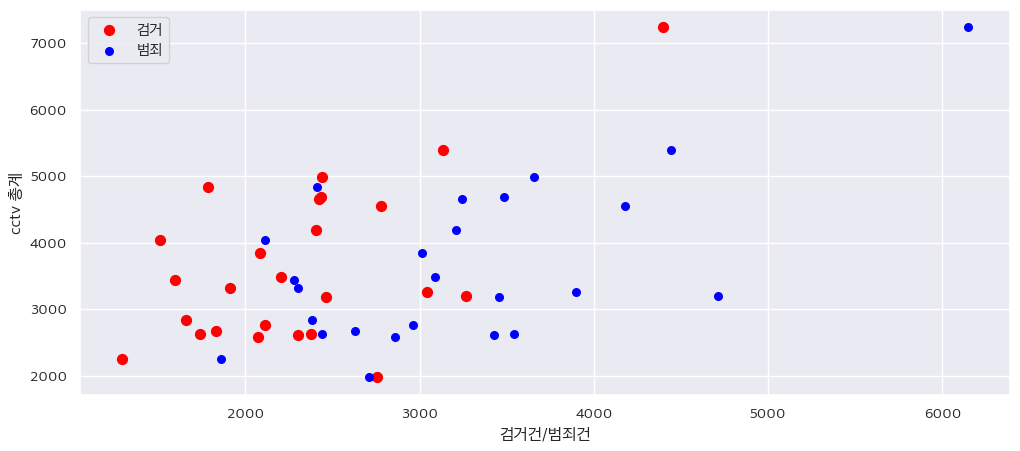

In [40]:
ax = merge_crime_df.plot.scatter(x="검거건",y="cctv 총계",color="red",s=50,label="검거")
merge_crime_df.plot.scatter(x="범죄건",y="cctv 총계",color="blue",s=30,label="범죄",ax=ax)
plt.xlabel("검거건/범죄건")
plt.show()  # 같이 그려짐

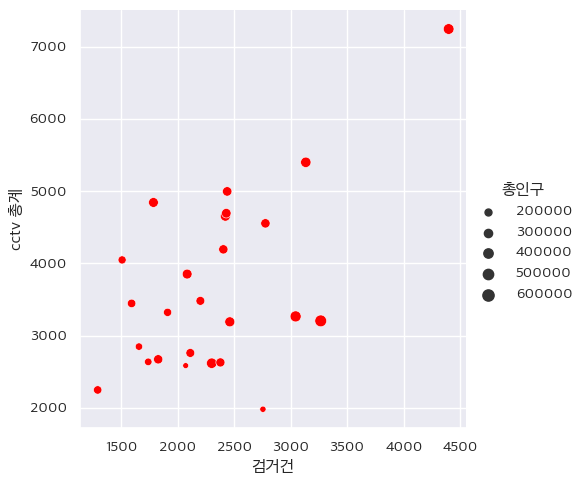

In [41]:
g = sns.relplot(x="검거건",y="cctv 총계",color="red",size="총인구",data=merge_crime_df)